In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from spacy.lang.en import English

In [3]:
tweets_df = pd.read_csv("DisasterTweets.csv")

tweets_df.head()

,Name,UserName,Timestamp,Verified,Tweets,Comments,Retweets,Likes,Impressions,Tags,Tweet Link,Tweet ID,Disaster
0,Drought Center,@DroughtCenter,2024-02-29T13:30:07.000Z,False,US Drought Monitor 2-29-24\n\nHappy Leap Day! ...,0,17,13,18000,"['#droughtmonitor', '#drought', '#drought2024'...",https://twitter.com/DroughtCenter/status/17631...,1.763190e+18,Drought
1,Prabhakar Goud Kurmimdla,@PrabhakarGoud_K,2024-02-27T05:20:43.000Z,False,Synonym is #Drought,0,0,1,13,['#Drought'],https://twitter.com/PrabhakarGoud_K/status/176...,1.762350e+18,Drought
2,Humanity First International,@HFI1995,2024-03-03T07:03:34.000Z,False,"Across South America in the last two months, #...",0,9,19,419,"['#floods', '#landslides', '#drought', '#wildf...",https://twitter.com/HFI1995/status/17641848294...,1.764180e+18,Floods
3,NCWQ Worldwide News And Disasters Explorer,@RTheExplorer1,2024-02-29T10:20:18.000Z,False,Wildfires Going On In Texas #wildfires #texa...,0,0,1,34,"['#wildfires', '#texasfires']",https://twitter.com/RTheExplorer1/status/17631...,1.763150e+18,Wildfire
4,BestDealsEver,@MilwaukeeHotBuy,2024-02-28T17:58:01.000Z,False,START YOUR STAND UP COMEDY CAREER FOR $11.99 ...,0,0,0,210,"['#thevoice', '#rhonj', '#taylorswift', '#mia'...",https://twitter.com/MilwaukeeHotBuy/status/176...,1.762900e+18,Hurricanes


In [4]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         2558 non-null   object 
 1   UserName     2559 non-null   object 
 2   Timestamp    2559 non-null   object 
 3   Verified     2559 non-null   bool   
 4   Tweets       2559 non-null   object 
 5   Comments     2559 non-null   int64  
 6   Retweets     2559 non-null   int64  
 7   Likes        2559 non-null   object 
 8   Impressions  2559 non-null   int64  
 9   Tags         2559 non-null   object 
 10  Tweet Link   2559 non-null   object 
 11  Tweet ID     2559 non-null   float64
 12  Disaster     2559 non-null   object 
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 242.5+ KB


In [5]:
# Convert data types to appropriate data types
tweets_df['Name'] = tweets_df['Name'].astype('category')
tweets_df['UserName'] = tweets_df['UserName'].astype('category')
tweets_df['Timestamp'] = pd.to_datetime(tweets_df['Timestamp'])
tweets_df['Tweets'] = tweets_df['Tweets'].astype('str')
tweets_df['Tags'] = tweets_df['Tags'].astype('str')
tweets_df['Tweet ID'] = tweets_df['Tweet ID'].astype('int64')
tweets_df['Disaster'] = tweets_df['Disaster'].astype('category')
tweets_df['Likes'] = tweets_df['Likes'].astype('str')
tweets_df['Retweets'] = tweets_df['Retweets'].astype('int64')
tweets_df['Comments'] = tweets_df['Comments'].astype('int64')
tweets_df['Impressions'] = tweets_df['Impressions'].astype('int64')
tweets_df['Verified'] = tweets_df['Verified'].astype('bool')

In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2559 entries, 0 to 2558
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   Name         2558 non-null   category           
 1   UserName     2559 non-null   category           
 2   Timestamp    2559 non-null   datetime64[ns, UTC]
 3   Verified     2559 non-null   bool               
 4   Tweets       2559 non-null   object             
 5   Comments     2559 non-null   int64              
 6   Retweets     2559 non-null   int64              
 7   Likes        2559 non-null   object             
 8   Impressions  2559 non-null   int64              
 9   Tags         2559 non-null   object             
 10  Tweet Link   2559 non-null   object             
 11  Tweet ID     2559 non-null   int64              
 12  Disaster     2559 non-null   category           
dtypes: bool(1), category(3), datetime64[ns, UTC](1), int64(4), object(4)
memory us

In [7]:
# Perform some exploratory data analysis on the dataset

# Check for missing values in the dataset
tweets_df.isnull().sum()

Name           1
UserName       0
Timestamp      0
Verified       0
Tweets         0
Comments       0
Retweets       0
Likes          0
Impressions    0
Tags           0
Tweet Link     0
Tweet ID       0
Disaster       0
dtype: int64

In [8]:
# Retrieve a summary of statistics for the dataset
tweets_df.describe()

,Comments,Retweets,Impressions,Tweet ID
count,2559.000000,2559.000000,2559.000000,2.559000e+03
mean,0.775694,3.789371,1195.523251,1.763440e+18
std,7.866340,21.404218,6360.882788,9.546477e+14
min,0.000000,0.000000,0.000000,1.761070e+18
25%,0.000000,0.000000,55.000000,1.762720e+18
50%,0.000000,0.000000,170.000000,1.763550e+18
75%,0.000000,2.000000,568.000000,1.764400e+18
max,369.000000,701.000000,159000.000000,1.764620e+18


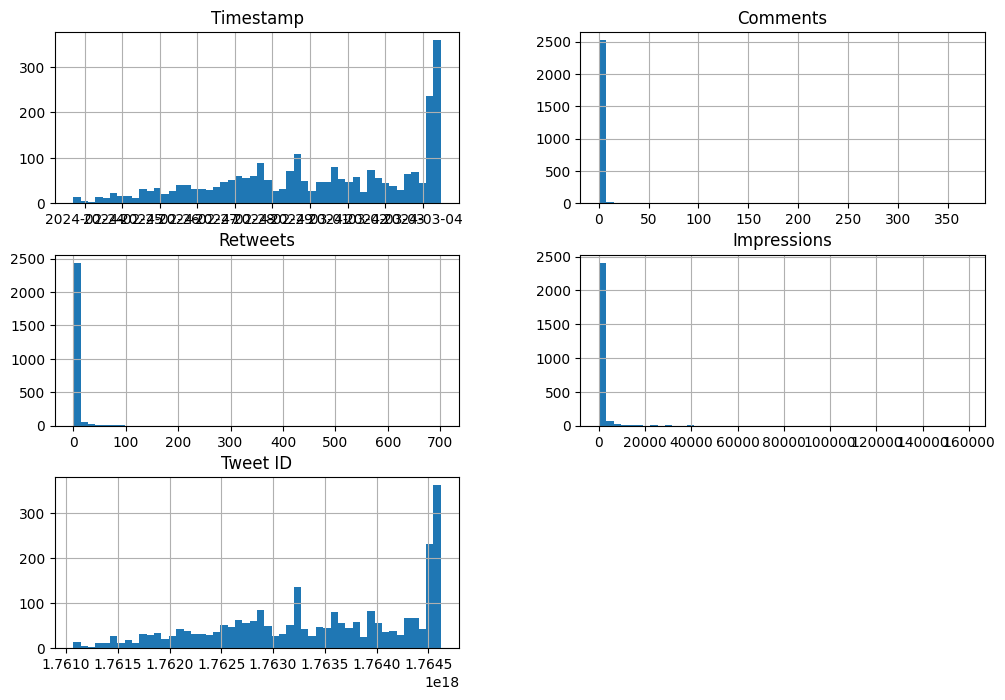

In [9]:
# Histogram to visualize the distribution of comments, retweets, and impressions
tweets_df.hist(bins=50, figsize=(12, 8))
plt.show()

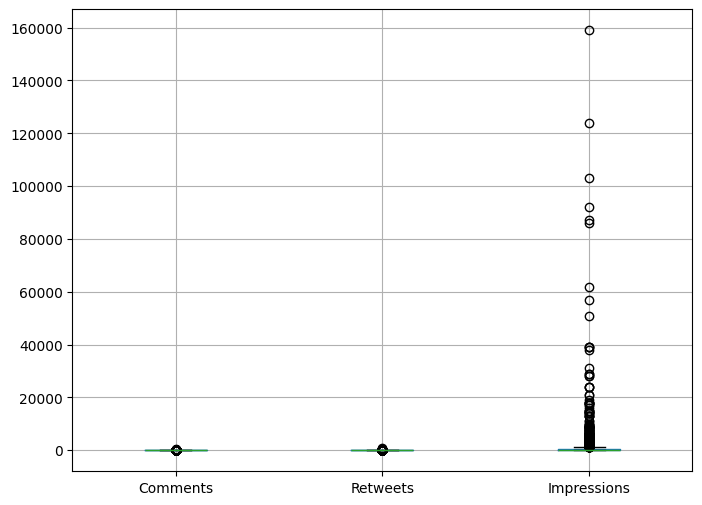

In [10]:
# Box plot to detect outliers in comments, retweets, and impressions
tweets_df.boxplot(column=['Comments', 'Retweets', 'Impressions'], figsize=(8, 6))
plt.show()

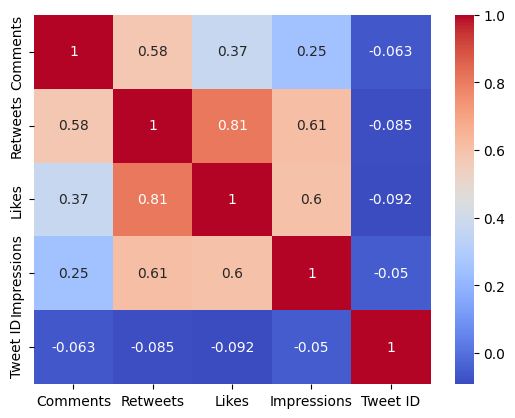

In [11]:
# Function to convert variable to numeric for 'Likes' column
def convert_to_numeric(x):
    if 'K' in x:
        return float(x.replace('K', '')) * 1000
    elif 'M' in x:
        return float(x.replace('M', '')) * 1000000
    else:
        return float(x)

tweets_df['Likes'] = tweets_df['Likes'].apply(convert_to_numeric)

# Correlation matrix to identify relationships between variables where the data is numeric
numeric_cols = tweets_df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = tweets_df[numeric_cols].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [12]:
# Contingency table to identify relationships between variables where the data is categorical
contingency_table = pd.crosstab(tweets_df['Disaster'], tweets_df['Verified'])
contingency_table

Verified,False,True
Disaster,,
Drought,591,179
Earthquake,341,159
Floods,336,100
Hurricanes,143,35
Tornadoes,100,35
Wildfire,401,139


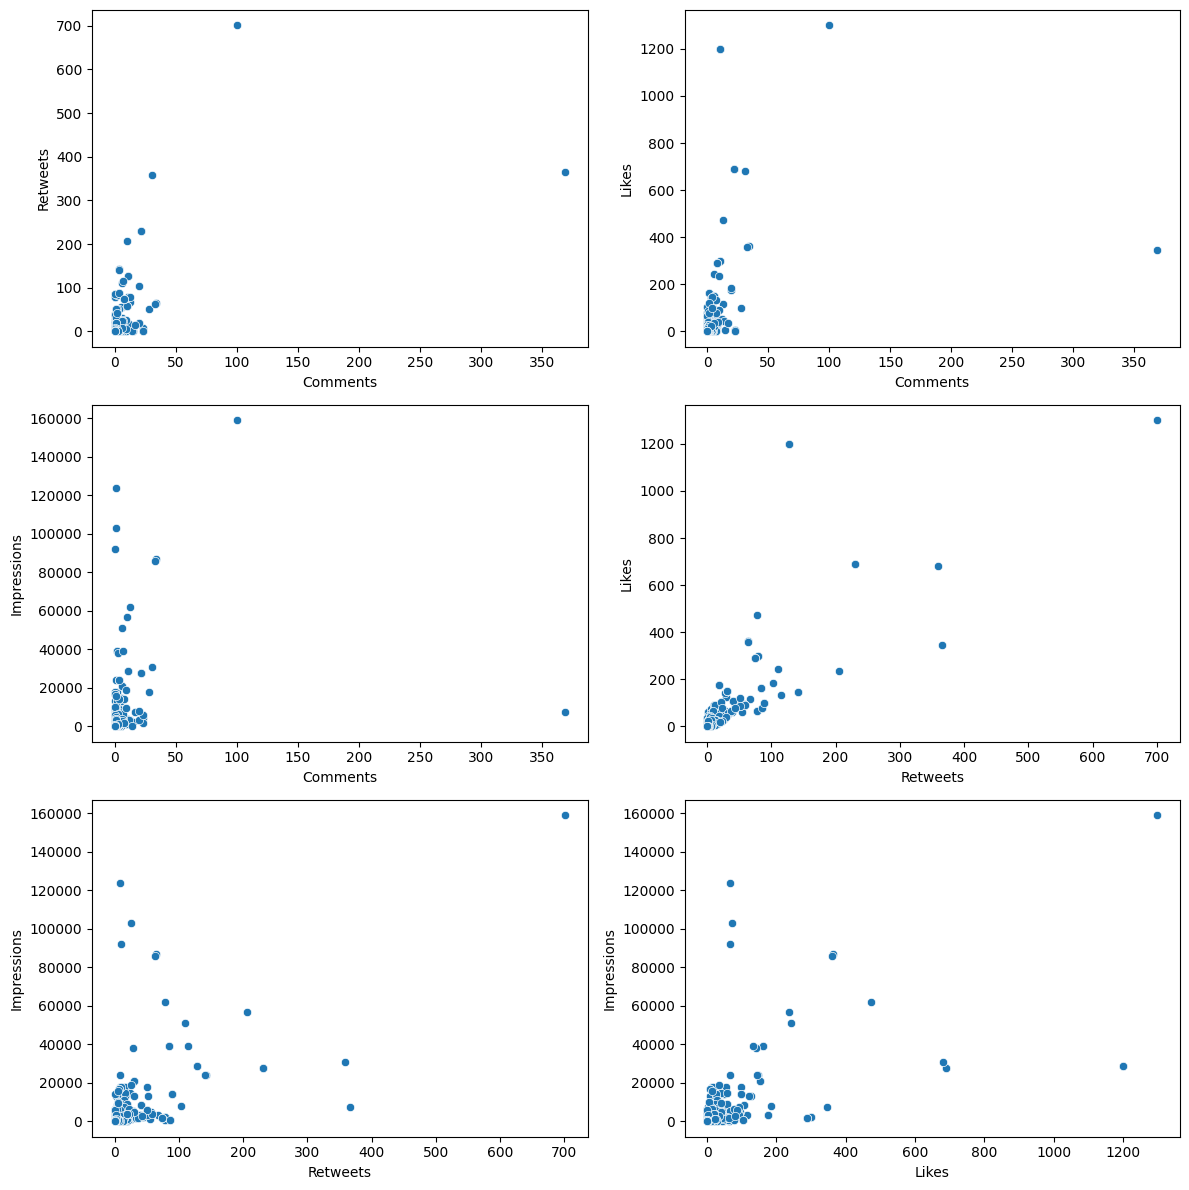

In [13]:
# Subplots with scatter plots to identify relationships between variables where the data is numeric
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
sns.scatterplot(x='Comments', y='Retweets', data=tweets_df, ax=axes[0, 0])
sns.scatterplot(x='Comments', y='Likes', data=tweets_df, ax=axes[0, 1])
sns.scatterplot(x='Comments', y='Impressions', data=tweets_df, ax=axes[1, 0])
sns.scatterplot(x='Retweets', y='Likes', data=tweets_df, ax=axes[1, 1])
sns.scatterplot(x='Retweets', y='Impressions', data=tweets_df, ax=axes[2, 0])
sns.scatterplot(x='Likes', y='Impressions', data=tweets_df, ax=axes[2, 1])
plt.tight_layout()
plt.show()

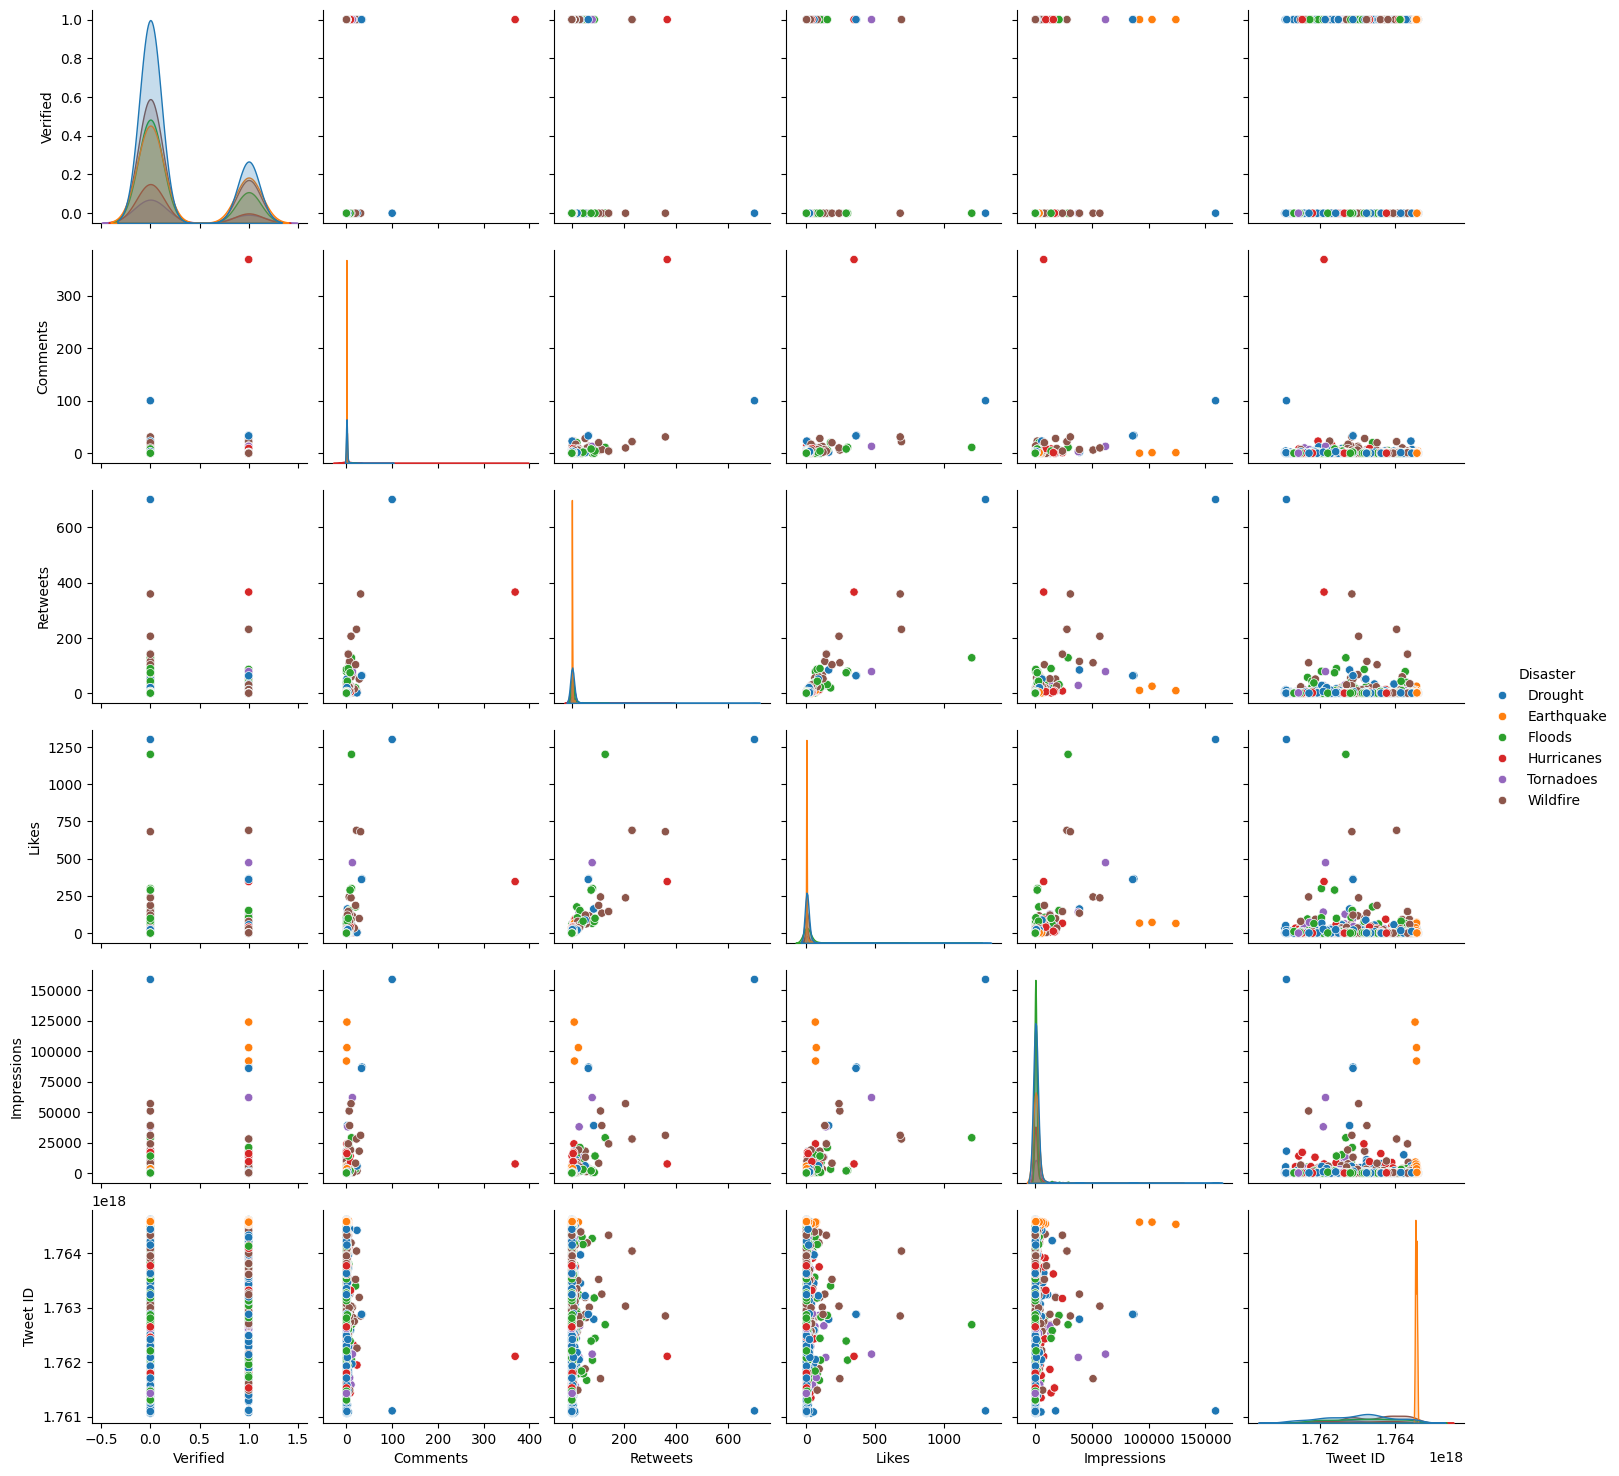

In [14]:
# Subplots of pair plots to identify relationships between variables where the data is numeric
sns.pairplot(tweets_df, hue='Disaster')
plt.show()